In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

import numpy as np
import pandas as pd
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
from mord import LogisticIT

import warnings
warnings.filterwarnings('ignore')

## Problem Statement

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

## Data Wrangling and Describe

In [2]:
df= pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Outcome is binary variable.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are 768 observations and 9 features. There are no null values. 

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.duplicated().sum()

0

There are no duplicated values.

In [7]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Data Visualization

<AxesSubplot:>

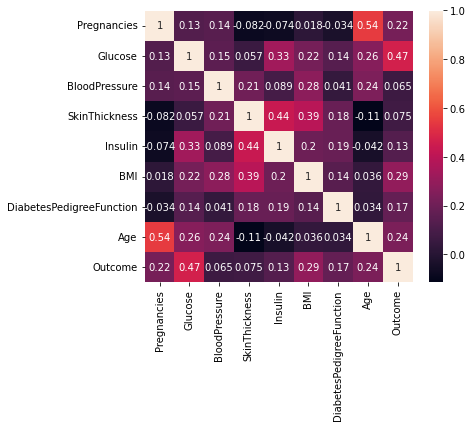

In [8]:
plt.figure(figsize=(6, 5))
sns.heatmap(df.corr(),annot=True)

It seems that outcome and other variables are positively correlated. It is most correlated with glucose and less correlated with blood pressure and skin thickness.

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

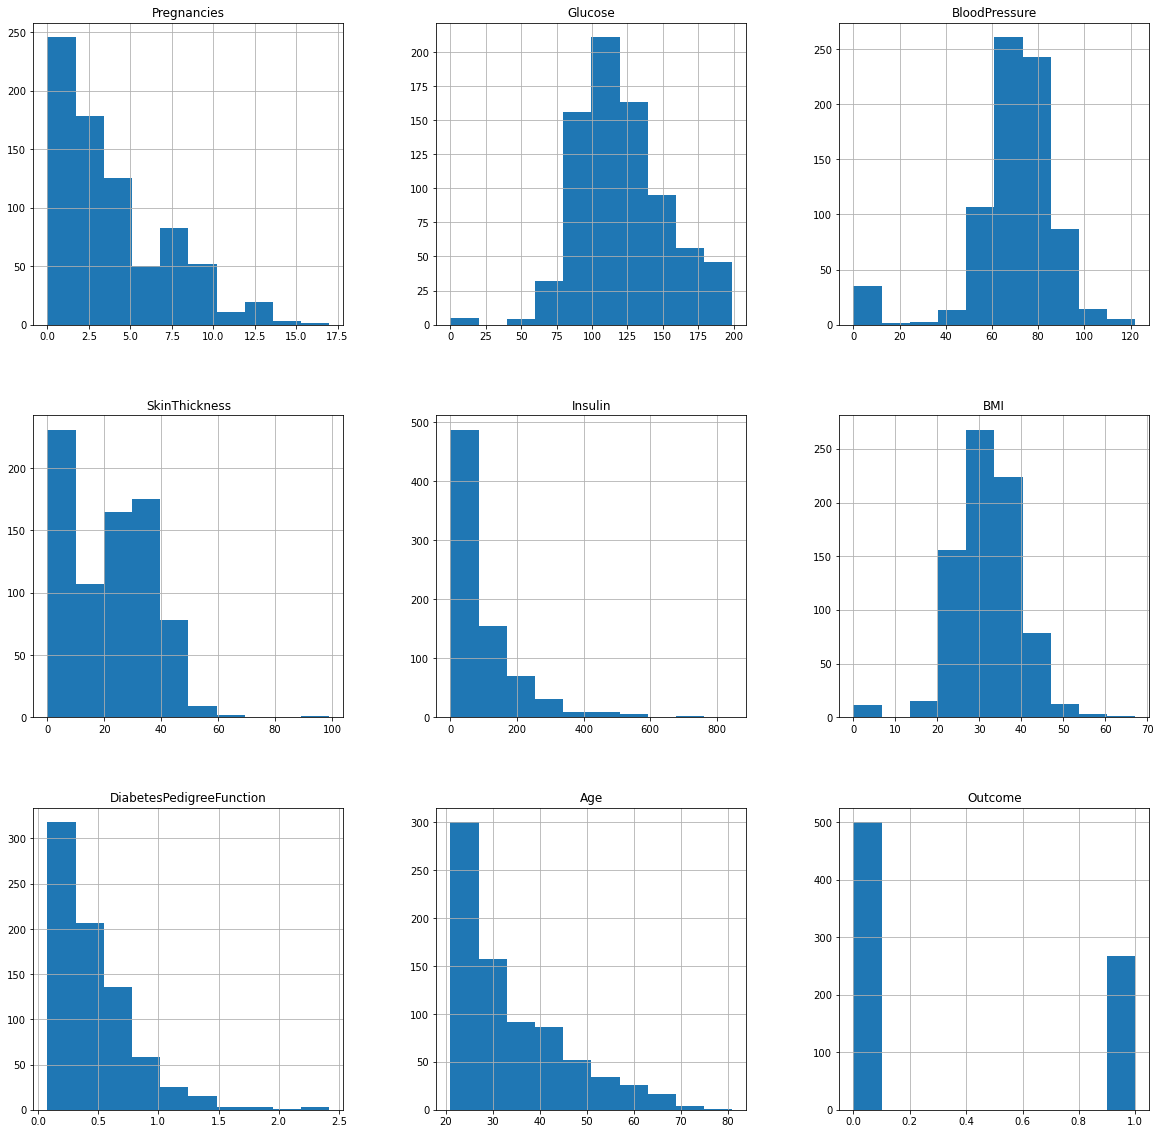

In [9]:
df.hist(figsize=(20,20))

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

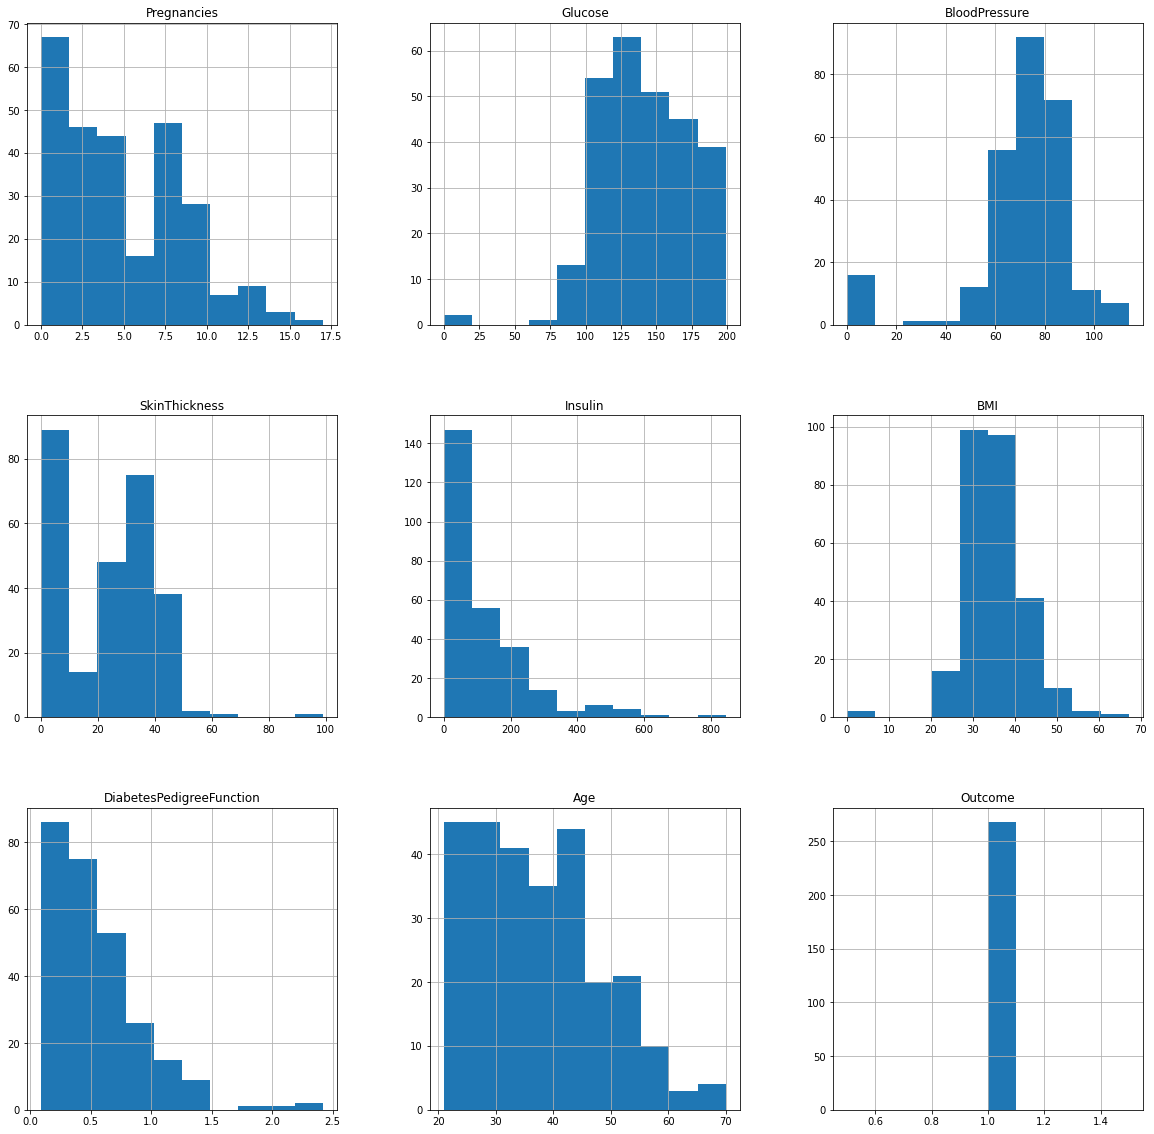

In [10]:
df_outcome=df[df['Outcome']==1]
df_outcome.hist(figsize=(20,20))

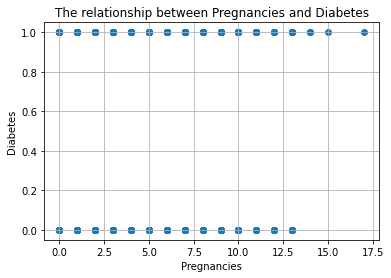

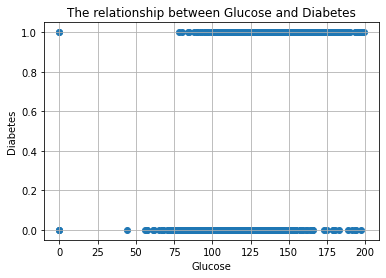

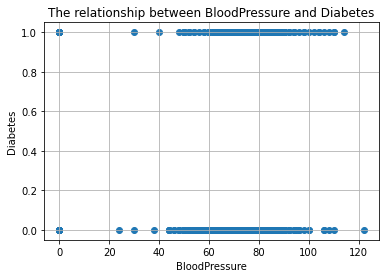

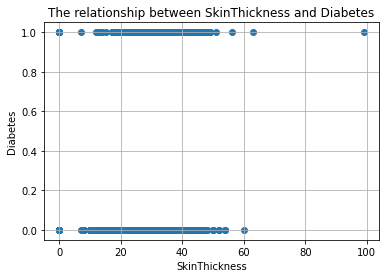

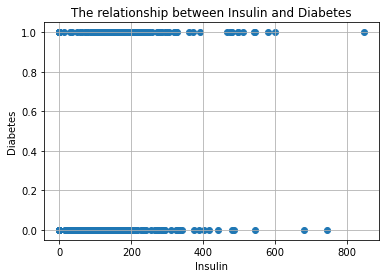

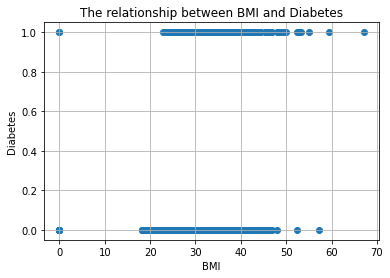

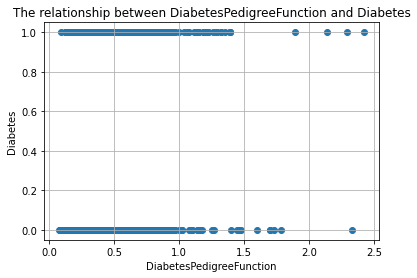

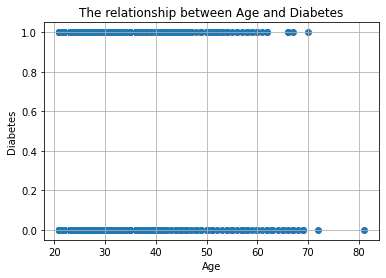

In [11]:
col_name=df.drop('Outcome', axis = 1).columns


for i in col_name:
    plt.scatter (df[i] , df["Outcome"] )
    plt.title (f"The relationship between {i} and Diabetes" )
    plt.xlabel (i)
    plt.ylabel ('Diabetes')
    plt.grid ()
    plt.show ()

## PCA

In [21]:
# convert to categorical
df['Outcome']=df['Outcome'].astype('category')
X =df[df.drop('Outcome', axis = 1).columns]
y = df['Outcome']

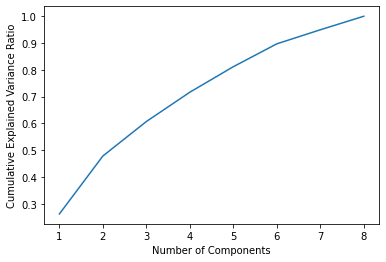

Number of Components: 8


In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

cumulative_var_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1,9), cumulative_var_ratio)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

n_components = np.where(cumulative_var_ratio >= 0.95)[0][0] + 1
print('Number of Components:', n_components)

There is no need to use PCA to reduce demensions.

## Modeling

In [15]:
# partition data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)

lr = LogisticRegression(penalty="l2",solver="liblinear")
lr.fit(train_X, train_y)

print('AIC', AIC_score(test_y, lr.predict(test_X), df = len(train_X.columns) + 1))
print('intercept ', lr.intercept_[0])
print(pd.DataFrame({'coeff': lr.coef_[0]}, index=X.columns).transpose()) 
print()

classificationSummary(train_y, lr.predict(train_X))
classificationSummary(test_y, lr.predict(test_X))

AIC 450.6569111719219
intercept  -0.931495969244547
              0         1         2         3         4         5        6  \
coeff  0.004574 -0.042127  0.003921  0.016645  0.037617 -0.109359  0.06852   

              7  
coeff  0.364897  

Confusion Matrix (Accuracy 0.7783)

       Prediction
Actual   0   1
     0 261  40
     1  62  97
Confusion Matrix (Accuracy 0.7630)

       Prediction
Actual   0   1
     0 176  23
     1  50  59


In [16]:
# Set up for k-fold cross-validation
nfolds = 10
CVInfo = cross_validate(lr, X, y, cv=nfolds,return_train_score=True)
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

0.7812500522824424
0.7734791524265209


Using k-fold cross validation could help reduce the risk of overfitting.

In [17]:
shuffle = ShuffleSplit(n_splits=100, test_size=.5)
CVInfo = cross_validate(lr, X, y, cv=shuffle,return_train_score=True)

print('intercept ', lr.intercept_[0])
print(pd.DataFrame({'coeff': lr.coef_[0]}, index=X.columns).transpose()) 
print()

intercept  -0.931495969244547
              0         1         2         3         4         5        6  \
coeff  0.004574 -0.042127  0.003921  0.016645  0.037617 -0.109359  0.06852   

              7  
coeff  0.364897  



In [18]:
print(np.mean(CVInfo['train_score']))
print(np.mean(CVInfo['test_score']))

0.7827083333333331
0.7639322916666665


Using shuffle could randomly rearrange the order of the data before splitting it into training and test sets, or before feeding it into a model for training. 

In [19]:
#find best k
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 15
neighbors_settings = range(1, 16)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    CVInfo = cross_validate(knn, X, y, cv=shuffle,return_train_score=True)
    # record train accuracy
    training_accuracy.append(np.mean(CVInfo['train_score']))
    # record test accuracy
    test_accuracy.append(np.mean(CVInfo['test_score']))

best_index = np.argmax(test_accuracy) # find index for max accuracy
best_neighbors = neighbors_settings[best_index]  # now find best number of neighbors

print(best_neighbors)

11


In [20]:
knn = KNeighborsClassifier(n_neighbors=best_neighbors)
CVInfo = cross_validate(knn, X, y, cv=shuffle,return_train_score=True)
print('train',np.mean(CVInfo['train_score']))
print('test',np.mean(CVInfo['test_score']))

train 0.7874739583333333
test 0.72671875


knn model performs worse than logistics model.